# CREDIT EDA ASSIGNMENT SOLUTION -  RINKLE DAS

# Problem Statement - I

## Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

#### When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


#### The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

**The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

**All other cases:** All other cases when the payment is paid on time.

#### When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

**Approved:** The Company has approved loan Application

**Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

**Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer:**  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

## Importing libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
pd.set_option("display.width",1000)

## Reading & Understanding the Datasets

In [8]:
AD=pd.read_csv("application_data.csv")
PA=pd.read_csv("previous_application.csv")

## Reviewing Datasets

In [9]:
AD.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [10]:
PA.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
AD.shape

(307511, 122)

In [12]:
PA.shape

(1670214, 37)

In [13]:
AD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [14]:
PA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [15]:
AD.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [16]:
PA.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Data Checking & Missing Values

In [17]:
#Checking missing values in Application data
(100*AD.isnull().sum()/len(AD)).round(2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [18]:
##Dropping columns where missing values are greater than 50%
AD = AD.loc[:, AD.isnull().mean() <= .50]

In [19]:
#Checking the Data again
(AD.isnull().sum()*100/len(AD)).round(2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

In [20]:
#Checking the missing values in previous application data.
(100*PA.isnull().sum()/len(PA)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [21]:
#Dropping columns where missing values are greater than 50%
PA = PA.loc[:, PA.isnull().mean() <= .50]

In [22]:
#Checking the data again
(PA.isnull().sum()*100/len(PA)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

## Identifying outliers in numeric columns

In [23]:
AD.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0

#### Checking "AMT_INCOME_TOTAL"

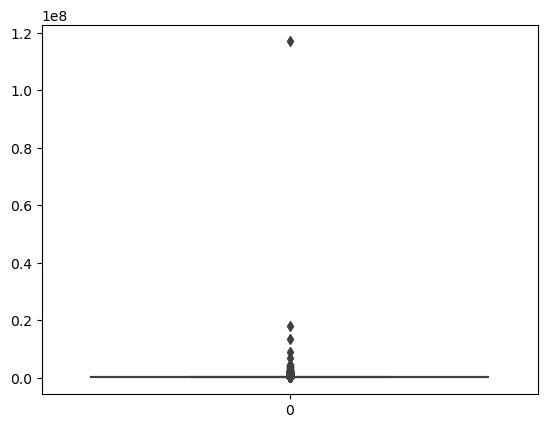

In [24]:
sns.boxplot(AD.AMT_INCOME_TOTAL)
plt.show()

In [25]:
#Excluding values outside 99 percentile
AD=AD[AD.AMT_INCOME_TOTAL<np.nanpercentile(AD['AMT_INCOME_TOTAL'], 99)]

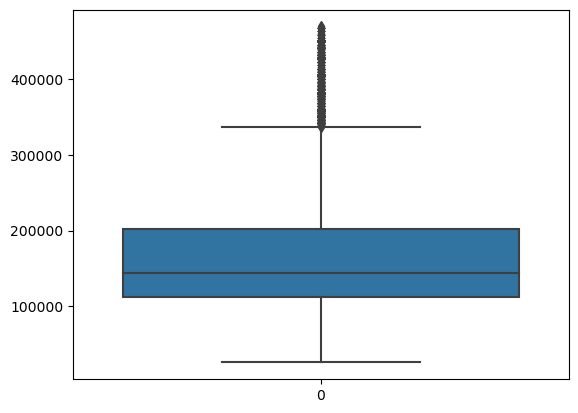

In [26]:
#Re-checking columns
sns.boxplot(AD.AMT_INCOME_TOTAL)
plt.show()

#### Checking "AMT_CREDIT"

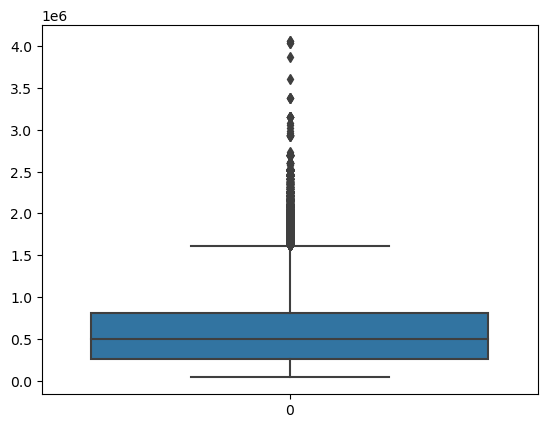

In [27]:
sns.boxplot(AD.AMT_CREDIT)
plt.show()

In [28]:
#Excluding values outside 99 percentile
AD=AD[AD.AMT_CREDIT<np.nanpercentile(AD['AMT_CREDIT'], 99)]

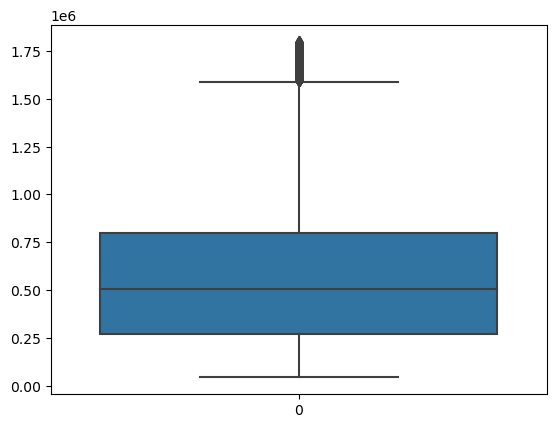

In [29]:
#Re-checking columns
sns.boxplot(AD.AMT_CREDIT)
plt.show()

#### Checking "AMT_ANNUITY"

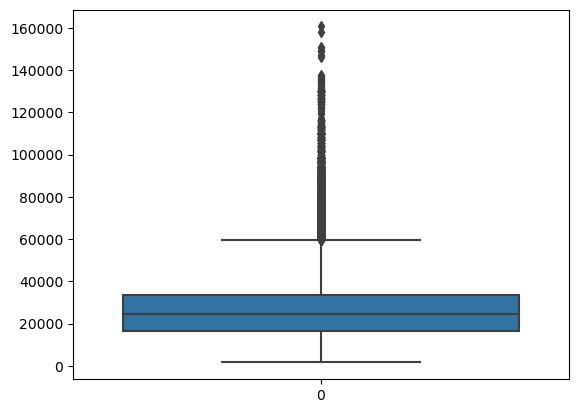

In [30]:
sns.boxplot(AD.AMT_ANNUITY)
plt.show()

In [31]:
#Excluding values outside 99 percentile
AD=AD[AD.AMT_ANNUITY<np.nanpercentile(AD['AMT_ANNUITY'], 99)]

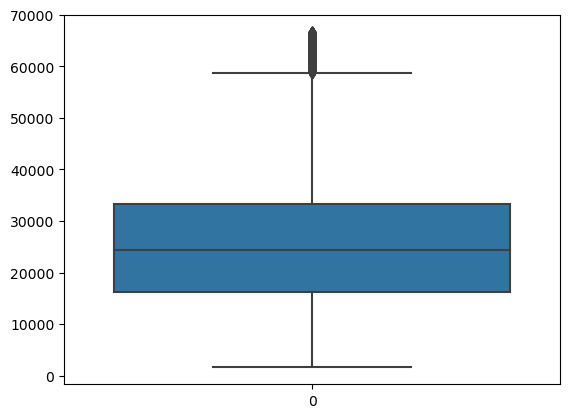

In [32]:
#Re-checking columns
sns.boxplot(AD.AMT_ANNUITY)
plt.show()

#### Checking "DAYS_EMPLOYED"

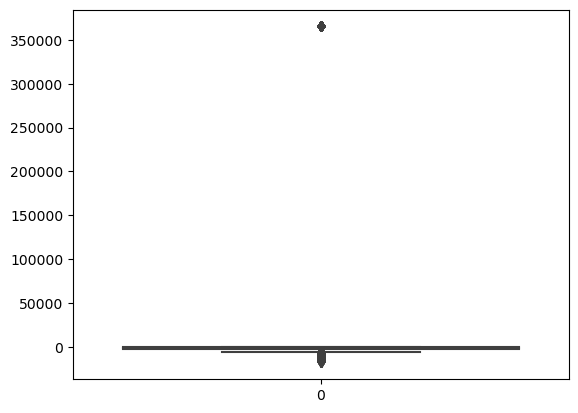

In [33]:
sns.boxplot(AD.DAYS_EMPLOYED)
plt.show()

In [34]:
#Excluding values outside 99 percentile
AD=AD[AD.DAYS_EMPLOYED<np.nanpercentile(AD['DAYS_EMPLOYED'], 99)]

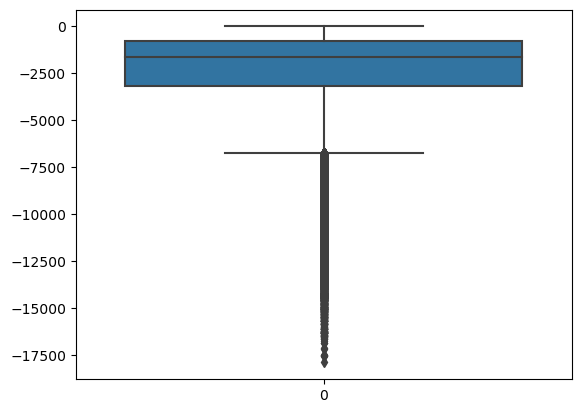

In [35]:
#Re- checking columns
sns.boxplot(AD.DAYS_EMPLOYED)
plt.show()

## Cleaning Data

#### Checking "CODE_GENDER "

In [36]:
AD.CODE_GENDER.value_counts(normalize=True)

F      0.626648
M      0.373335
XNA    0.000016
Name: CODE_GENDER, dtype: float64

In [37]:
#Replacing XNA with "F" as it is the majority of the population
AD.loc[AD["CODE_GENDER"]=="XNA","CODE_GENDER"]="F"

In [38]:
#Re-checking data again
AD.CODE_GENDER.value_counts(normalize=True)

F    0.626665
M    0.373335
Name: CODE_GENDER, dtype: float64

## Filling Missing values

#### Checking "AMT_GOODS_PRICE"

In [39]:
AD.AMT_GOODS_PRICE.isnull().sum()

251

In [40]:
AD.AMT_GOODS_PRICE.describe()

count    2.430880e+05
mean     5.204879e+05
std      3.293936e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      1.795500e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [41]:
#Fill NA values using mean
AD.AMT_GOODS_PRICE.fillna(AD.AMT_GOODS_PRICE.mean(),inplace = True)

In [42]:
#Re-check "AMT_GOODS_PRICE"
AD.AMT_GOODS_PRICE.isnull().sum()

0

#### Checking "NAME_TYPE_SUITE"

In [43]:
AD.NAME_TYPE_SUITE.isnull().sum()

1017

In [44]:
AD.NAME_TYPE_SUITE.value_counts()

Unaccompanied      197760
Family              30649
Spouse, partner      9341
Children             2200
Other_B              1431
Other_A               738
Group of people       203
Name: NAME_TYPE_SUITE, dtype: int64

In [45]:
#Replacing missing values with mode
mode_value = AD.NAME_TYPE_SUITE.mode()
mode_value

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [46]:
AD.NAME_TYPE_SUITE.fillna("Unaccompanied",inplace=True)

In [47]:
#Re-checking the data
AD.NAME_TYPE_SUITE.isnull().sum()

0

#### Checking "OCCUPATION_TYPE"

In [48]:
AD.OCCUPATION_TYPE.isnull().sum()

39530

In [49]:
AD.OCCUPATION_TYPE.value_counts()

Laborers                 54238
Sales staff              31455
Core staff               26542
Managers                 18775
Drivers                  18145
High skill tech staff    10949
Accountants               9199
Medicine staff            8377
Security staff            6634
Cooking staff             5892
Cleaning staff            4625
Private service staff     2548
Low-skill Laborers        2082
Waiters/barmen staff      1337
Secretaries               1270
Realty agents              729
HR staff                   525
IT staff                   487
Name: OCCUPATION_TYPE, dtype: int64

In [50]:
AD.OCCUPATION_TYPE.fillna("Laborers",inplace=True)

In [51]:
#Re-checking the data
AD.OCCUPATION_TYPE.isnull().sum()

0

## Binning of continuous variables

####  Use 'AMT_INCOME_Total'

In [52]:
AD['AMT_INCOME_TOTAL'].describe()

count    243339.000000
mean     166569.750729
std       75718.979452
min       25650.000000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      468823.500000
Name: AMT_INCOME_TOTAL, dtype: float64

In [53]:
#Binning 'AMT_INCOME_RANGE' based on quantiles
AD['AMT_INCOME_RANGE'] = pd.qcut(AD.AMT_INCOME_TOTAL, q=[0,0.20,0.50,0.80,1],labels=['Low','Medium','High','Very_high'])
AD['AMT_INCOME_RANGE'].head()

0         High
1    Very_high
2          Low
3       Medium
4       Medium
Name: AMT_INCOME_RANGE, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very_high']

#### Use  'AMT_CREDIT' 

In [54]:
AD.AMT_CREDIT.describe()

count    2.433390e+05
mean     5.814237e+05
std      3.629458e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.084955e+05
75%      8.086500e+05
max      1.798605e+06
Name: AMT_CREDIT, dtype: float64

In [55]:
#Binning 'AMT_CREDIT_RANGE' based on quantiles
AD['AMT_CREDIT_RANGE'] = pd.qcut(AD.AMT_CREDIT, q=[0,0.20,0.50,0.80,1],labels=['Low','Medium','High','Very_high'])
AD['AMT_CREDIT_RANGE'].head()

0       Medium
1    Very_high
2          Low
3       Medium
4         High
Name: AMT_CREDIT_RANGE, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very_high']

##  Converting 'DAYS_BIRTH' to years & Binning

In [56]:
AD['DAYS_BIRTH']= (AD['DAYS_BIRTH']/365).astype(int)

In [57]:
AD['DAYS_BIRTH'].head()

0   -25
1   -45
2   -52
3   -52
4   -54
Name: DAYS_BIRTH, dtype: int64

In [58]:
#Converting the -ve values to +ve using "ABSOLUTE"
AD['DAYS_BIRTH']= abs(AD['DAYS_BIRTH'])

In [59]:
#Binning 'DAYS_BIRTH'
AD['Age_Range']=pd.cut(AD['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [60]:
AD['Age_Range'].head()

0    Very_Young
1    Middle_Age
2    Middle_Age
3    Middle_Age
4    Middle_Age
Name: Age_Range, dtype: category
Categories (4, object): ['Very_Young' < 'Young' < 'Middle_Age' < 'Senior_Citizen']

## Checking Imbalance

In [61]:
AD['TARGET'].value_counts(normalize=True)

0    0.911843
1    0.088157
Name: TARGET, dtype: float64

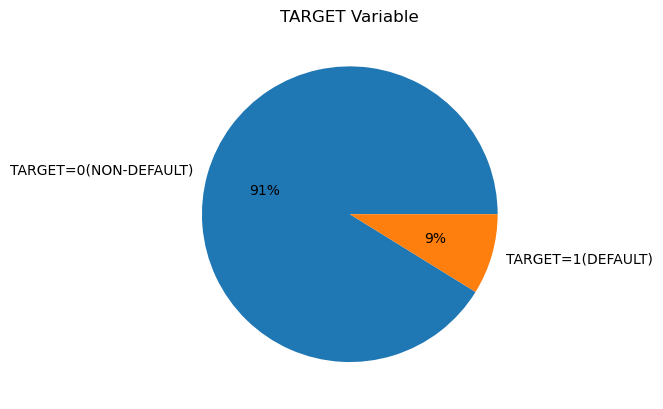

In [62]:
plt.pie(AD['TARGET'].value_counts(normalize=True)*100,labels=['TARGET=0(NON-DEFAULT)','TARGET=1(DEFAULT)'],autopct='%1.f%%')
plt.title('TARGET Variable')
plt.show()

## Splitting Data w.r.t TARGET=0 & TARGET=1

In [63]:
AD_t0 =AD[AD.TARGET==0]
AD_t1=AD[AD.TARGET==1]

## Univariate Analysis w.r.t TARGET 0 & TARGET 1

#### Analysis 
"CODE_GENDER" column data

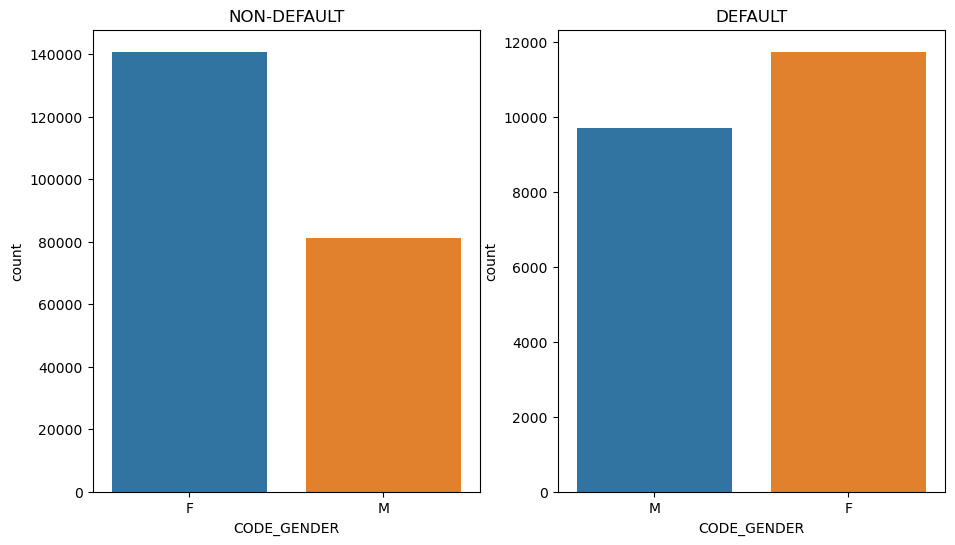

In [64]:
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
plt.title('NON-DEFAULT')
sns.countplot(x="CODE_GENDER", data = AD_t0)

plt.subplot(1,2,2)
plt.title('DEFAULT')
sns.countplot(x="CODE_GENDER", data = AD_t1)
plt.show()

### We've observed that more women are applying for loans compared to men, leading to a higher number of female defaulters. However, among male applicants, the default rate is higher than the rate of non-defaulting.

#### Analysis  
'NAME_CONTRACT_TYPE' column data

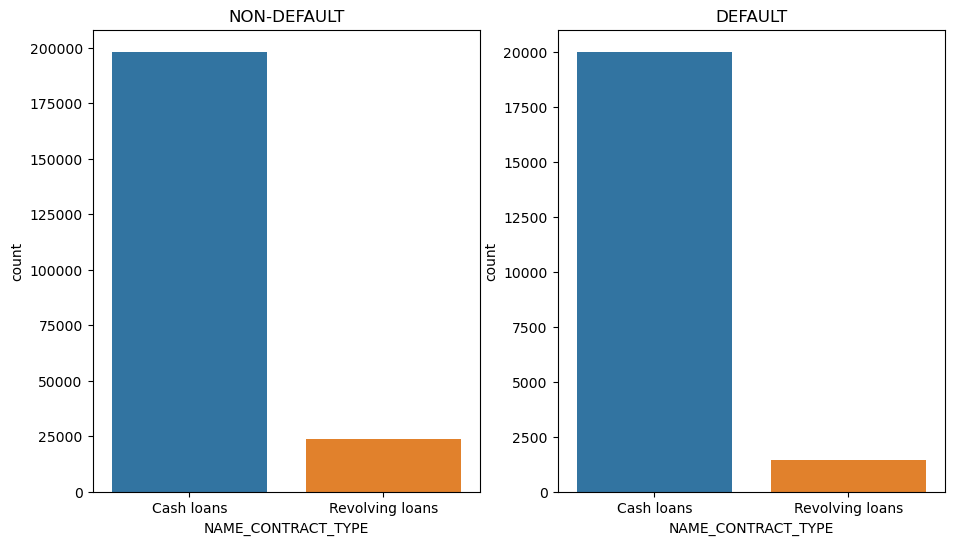

In [65]:
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
plt.title('NON-DEFAULT')
sns.countplot(x='NAME_CONTRACT_TYPE', data = AD_t0)

plt.subplot(1,2,2)
plt.title('DEFAULT')
sns.countplot(x='NAME_CONTRACT_TYPE', data = AD_t1)
plt.show()

### We can see that revolving loans are less common among the defaulted population, suggesting that they are comparatively safer. This might be due to the nature of revolving loans, which are considered a flexible financing tool because of their repayment and re-borrowing flexibility.

#### Analysis
'FLAG_OWN_CAR' column data

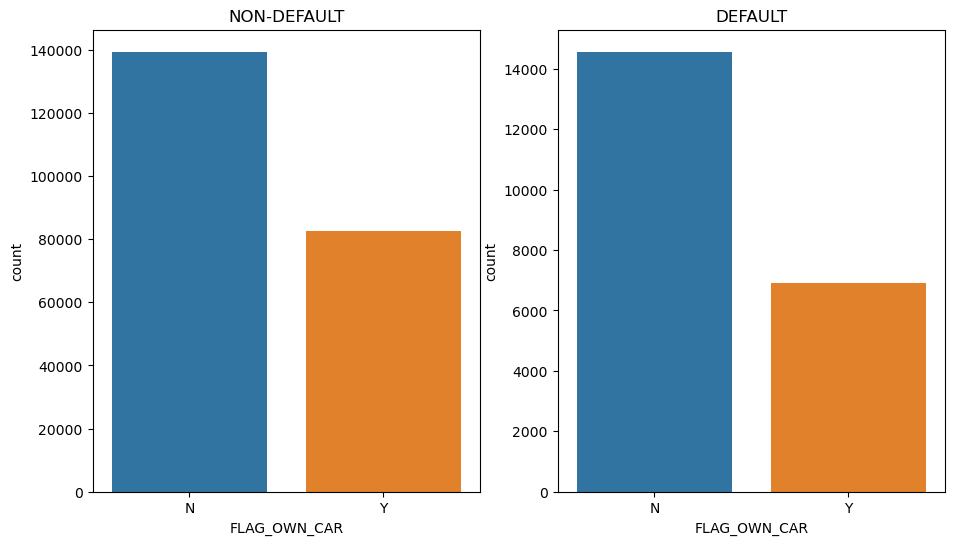

In [66]:
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
plt.title('NON-DEFAULT')
sns.countplot(x='FLAG_OWN_CAR', data = AD_t0)

plt.subplot(1,2,2)
plt.title('DEFAULT')
sns.countplot(x='FLAG_OWN_CAR', data = AD_t1)
plt.show()

### The default rate is lower among people who own a car compared to those who don't.

#### Analysis
'NAME_TYPE_SUITE' column data

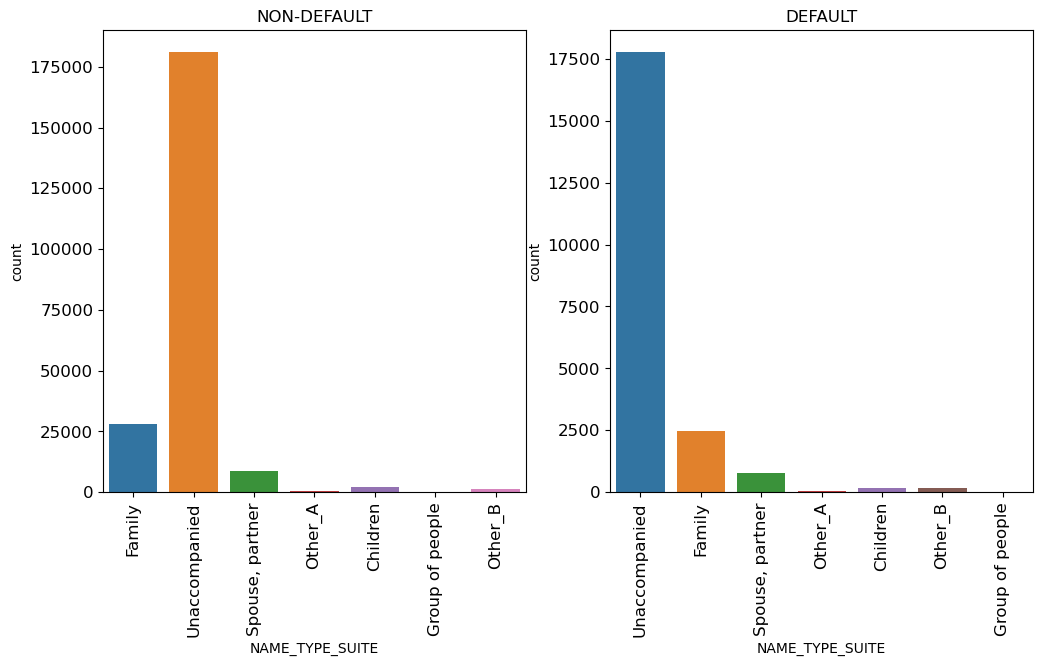

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('NON-DEFAULT')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
sns.countplot(x='NAME_TYPE_SUITE', data = AD_t0)

plt.subplot(1,2,2)
plt.title('DEFAULT')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
sns.countplot(x='NAME_TYPE_SUITE', data = AD_t1)
plt.show()

### Whether the client was accompanied while applying for the loan has no impact on the default rate, both groups have the same proportions.

#### Analysis
'NAME_INCOME_TYPE' column data

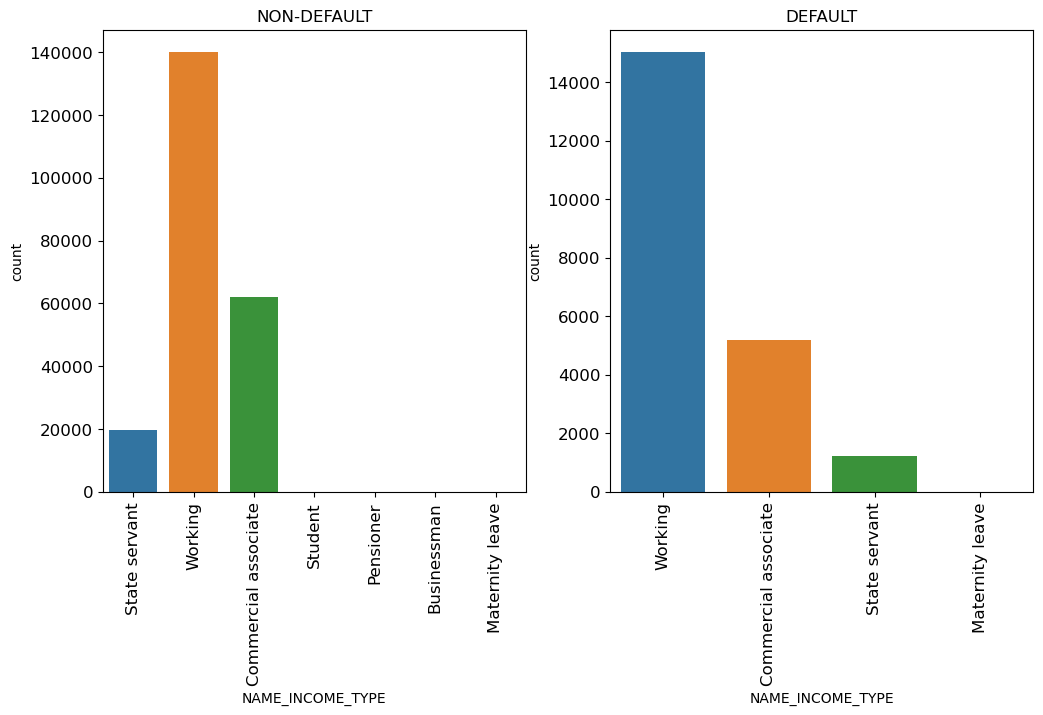

In [68]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('NON-DEFAULT')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
sns.countplot(x='NAME_INCOME_TYPE', data = AD_t0)

plt.subplot(1,2,2)
plt.title('DEFAULT')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
sns.countplot(x='NAME_INCOME_TYPE', data = AD_t1)
plt.show()

### Most defaults occur within the working population.

#### Analysis 
'AMT_INCOME_RANGE' column data

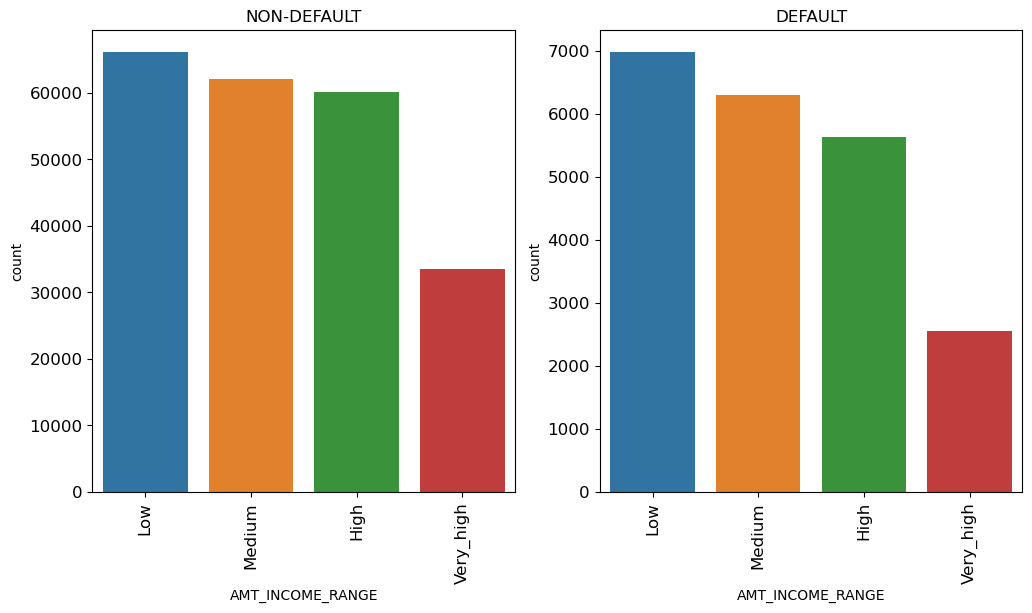

In [69]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('NON-DEFAULT')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
sns.countplot(x='AMT_INCOME_RANGE', data = AD_t0)

plt.subplot(1,2,2)
plt.title('DEFAULT')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
sns.countplot(x='AMT_INCOME_RANGE', data = AD_t1)
plt.show()

#### Analysis  
'NAME_HOUSING_TYPE' column data

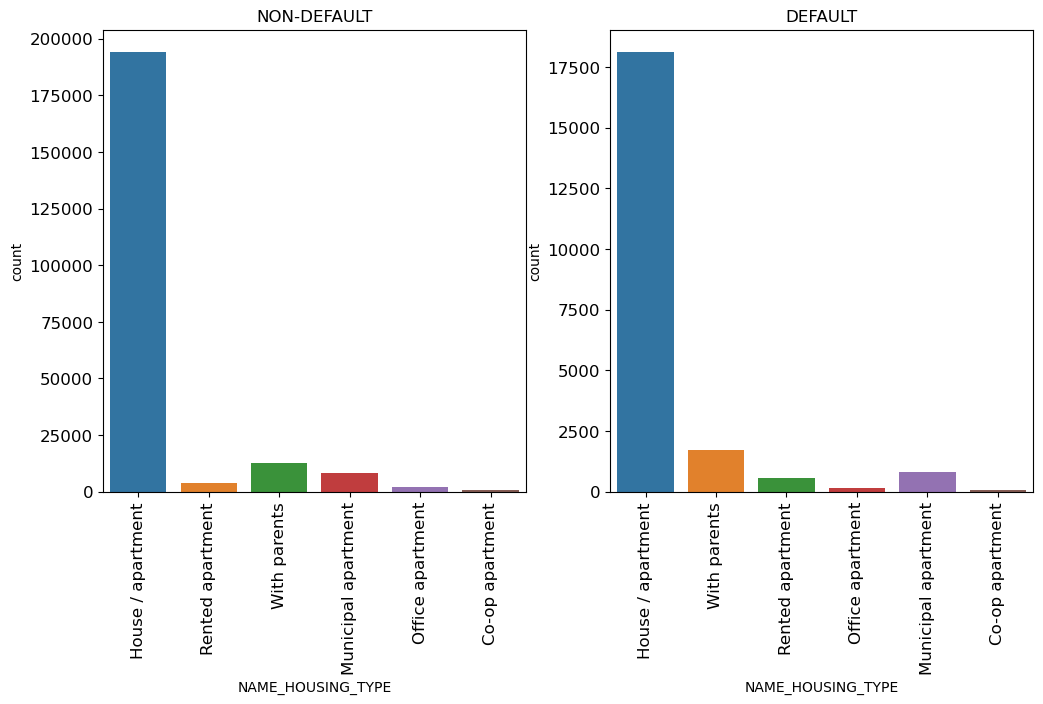

In [70]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('NON-DEFAULT')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
sns.countplot(x='NAME_HOUSING_TYPE', data = AD_t0)

plt.subplot(1,2,2)
plt.title('DEFAULT')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
sns.countplot(x='NAME_HOUSING_TYPE', data = AD_t1)
plt.show()

### It shows that people who own a house or apartment tend to apply for more loans, while those living with their parents are more likely to default compared to others.

#### Analysis 
'Age_Range' column data

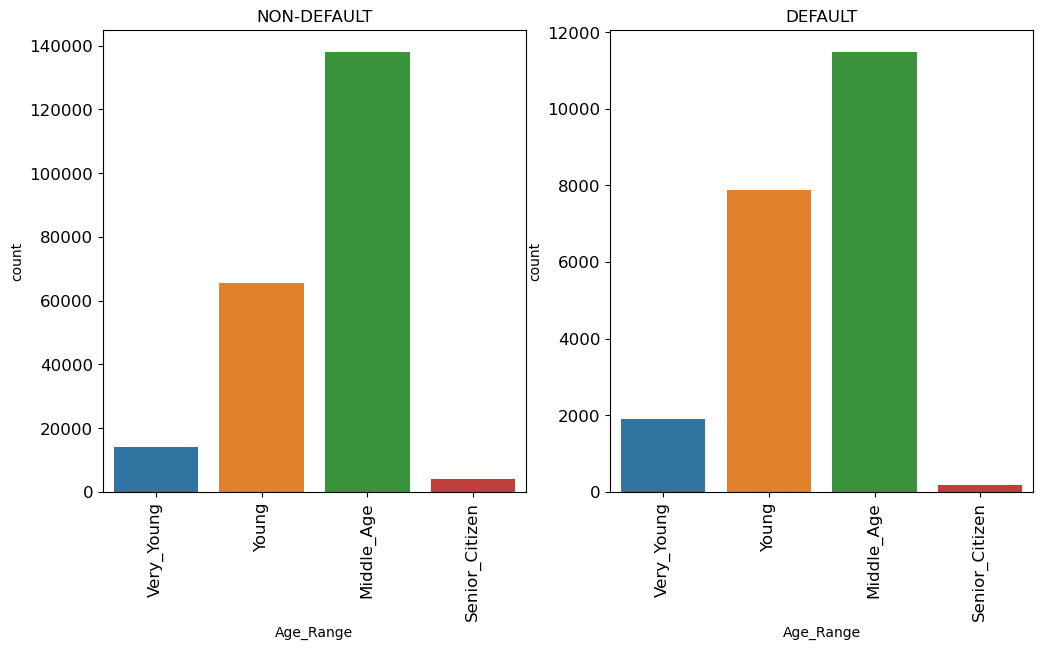

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('NON-DEFAULT')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
sns.countplot(x='Age_Range', data = AD_t0)

plt.subplot(1,2,2)
plt.title('DEFAULT')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
sns.countplot(x='Age_Range', data = AD_t1)
plt.show()

### It indicates that middle-aged individuals are more likely to apply for loans and are also the most at risk compared to other age groups.

#### Analysis 
"NAME_EDUCATION_TYPE" column data

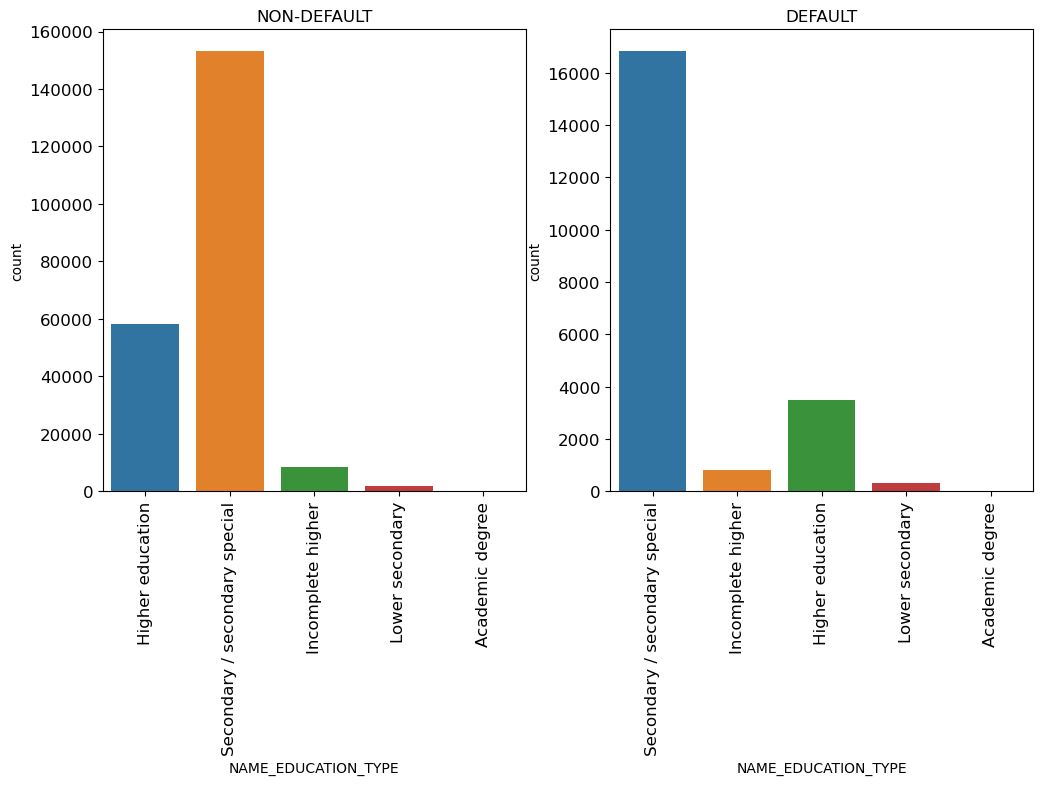

In [74]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('NON-DEFAULT')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
sns.countplot(x="NAME_EDUCATION_TYPE", data = AD_t0)

plt.subplot(1,2,2)
plt.title('DEFAULT')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
sns.countplot(x="NAME_EDUCATION_TYPE", data = AD_t1)
plt.show()

### It indicates that individuals with secondary education are the most frequent loan applicants and also have the highest default rates compared to others.

#### Analysis
"REGION_RATING_CLIENT" column data

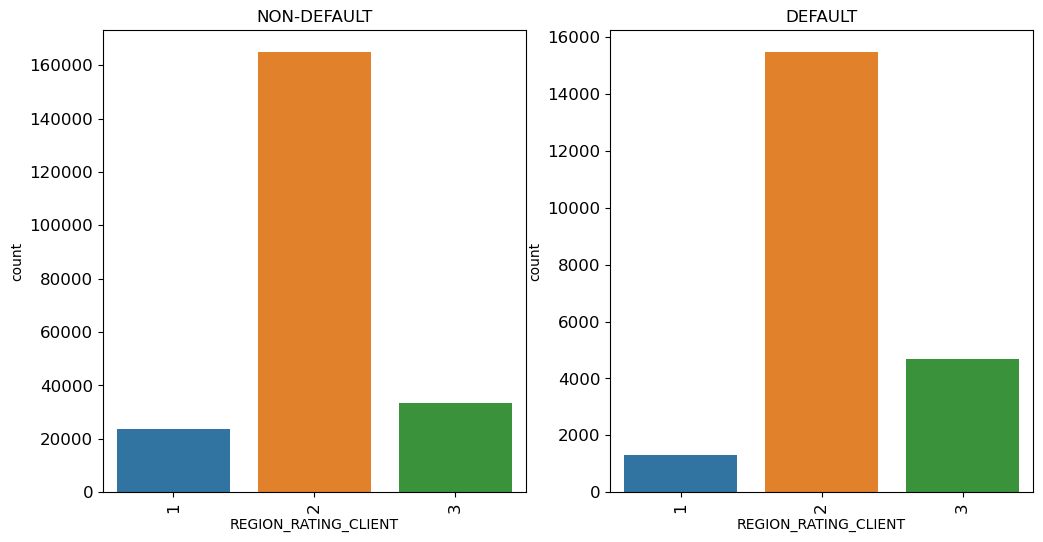

In [75]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('NON-DEFAULT')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
sns.countplot(x="REGION_RATING_CLIENT", data = AD_t0)

plt.subplot(1,2,2)
plt.title('DEFAULT')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
sns.countplot(x="REGION_RATING_CLIENT", data = AD_t1)
plt.show()

### People from second-tier regions are more likely to apply for loans, resulting in a higher default rate compared to other tier regions

#### Analysis 
"CNT_FAM_MEMBERS" column data

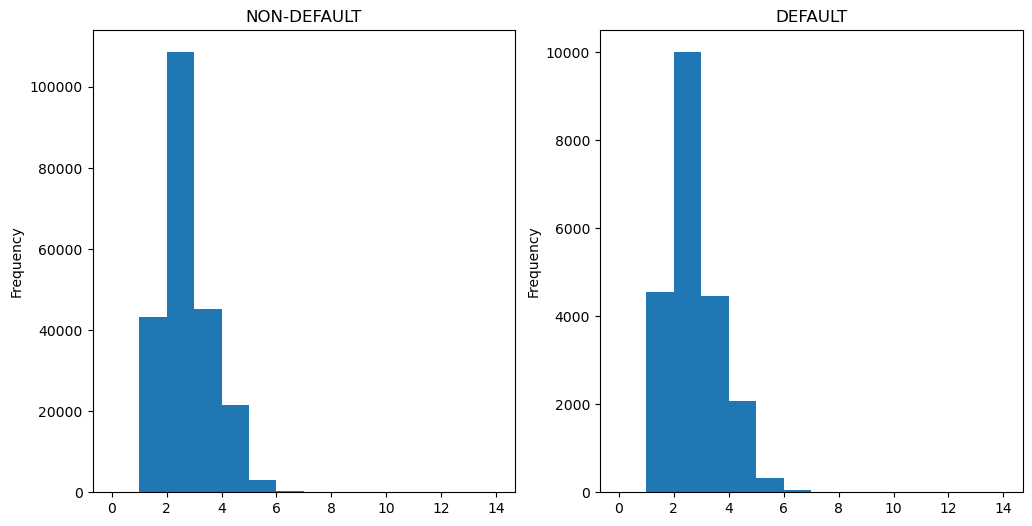

In [76]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
AD_t0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('NON-DEFAULT')
plt.subplot(1,2,2)
AD_t1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('DEFAULT')
plt.show()

### We observe that families of 3 apply for loans more frequently than other family sizes.

## BIVARIATE ANALYSIS

#### Analysis 
'AMT_CREDIT ' & 'AMT_INCOME_TOTAL'

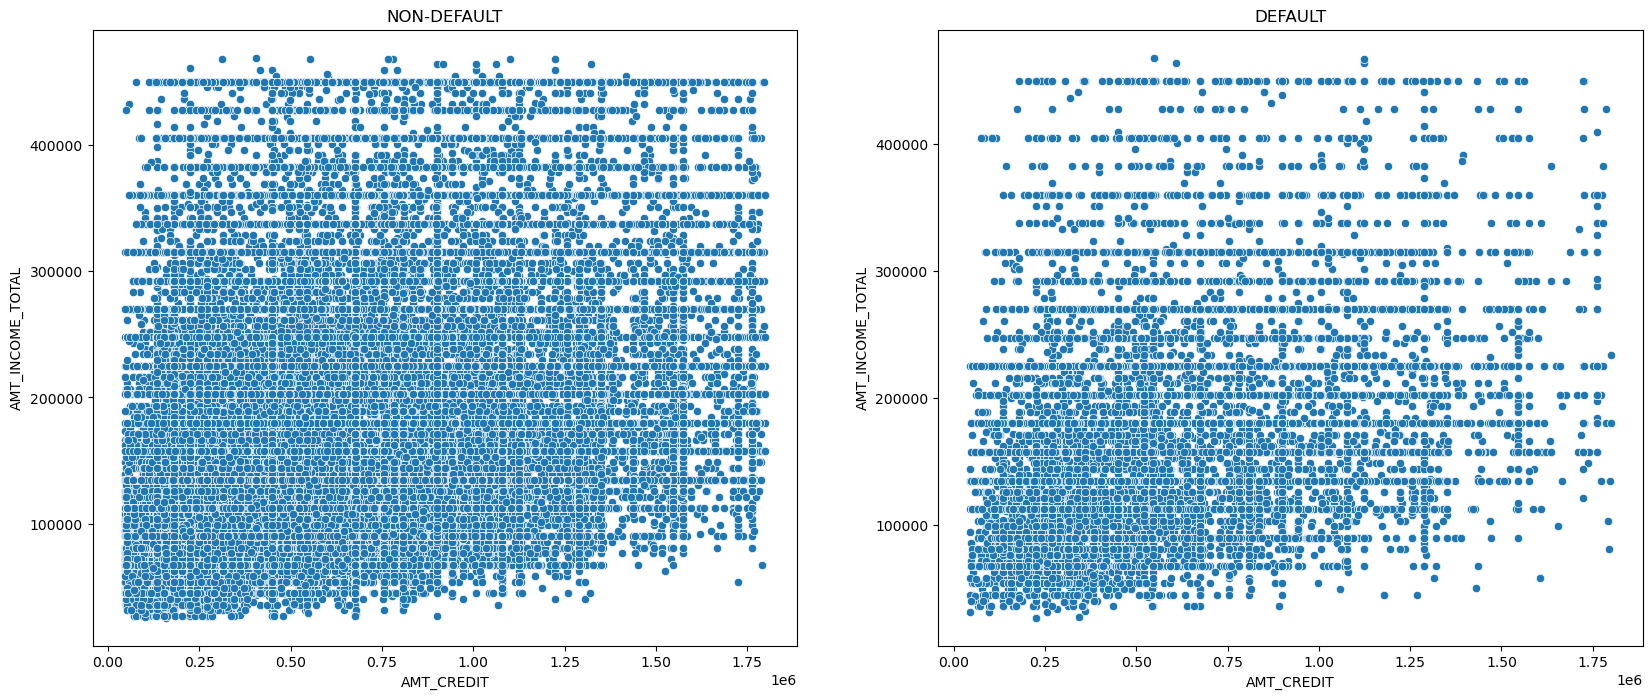

In [77]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=AD_t0)
plt.title('NON-DEFAULT')

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=AD_t1)
plt.title('DEFAULT')
plt.show()

### It indicates that the default rate is lower when income exceeds 300k or credit is below 200k.

#### Analysis
'AMT_CREDIT'  & 'AMT_GOODS_PRICE'

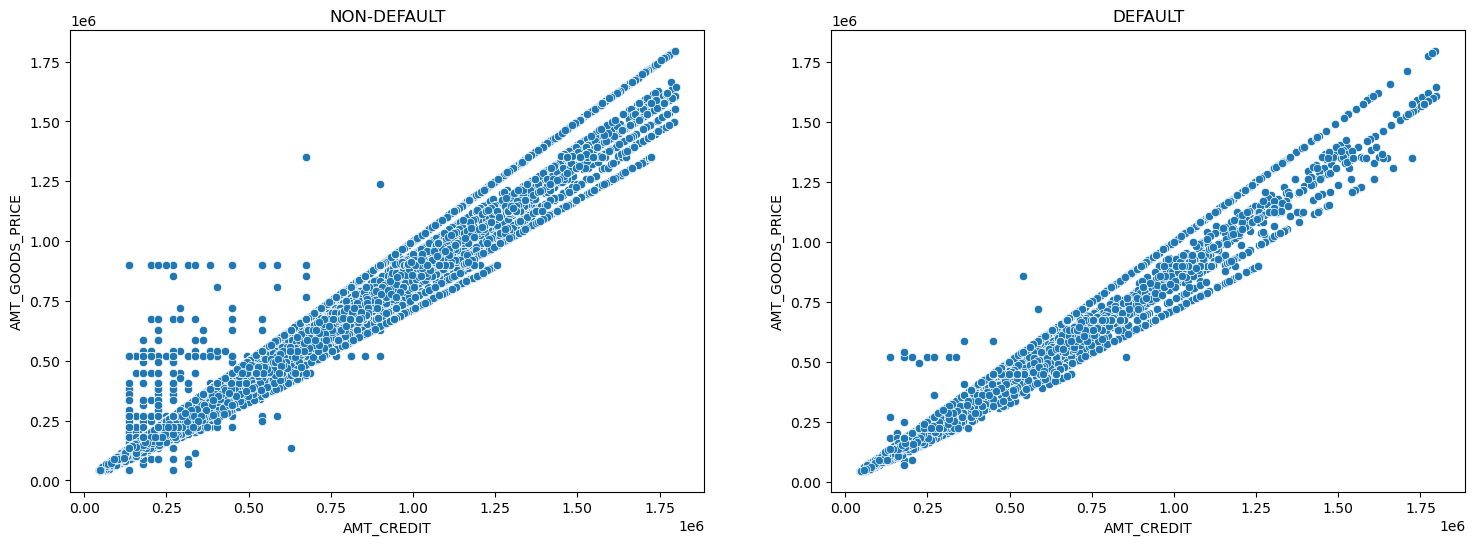

In [78]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=AD_t0)
plt.title('NON-DEFAULT')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=AD_t1)
plt.title('DEFAULT')
plt.show()

### Defaulters are fewer when the price of goods is up to 500k and the amount of credit is also less than 500k.

## Identifying correlations b/w numerical columns for both target values 0 and 1.

In [79]:
target0_corr=AD_t0.iloc[0:,2:]
target1_corr=AD_t1.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [80]:
# Correlation for target 0
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.022528,-0.022492,-0.009322,-0.026052,-0.029653,-0.265976,0.030704,0.157356,-0.120048,0.001549,0.001553,-0.011237,0.003692,-0.033880,0.008729,0.847714,0.035302,0.034000,-0.030551,-0.023185,-0.015188,-0.005336,0.001605,0.007609,0.013569,-0.026668,-0.016379,0.021385,-0.020796,0.021449,-0.019593,0.021610,-0.019994,-0.016889,0.027203,0.005621,0.026862,0.003637,-0.001058,0.003182,-0.008430,-0.003614,-0.027449,-0.047293,-0.002836,0.024550,-0.008915,-0.003793,-0.014169,0.002261,-0.002964,-0.011342,-0.000213,0.000894,0.000533,-0.004797,-0.001012,-0.000960,-0.004577,-0.000873,0.000675,-0.001641,-0.013009,-0.002031,-0.036776
AMT_INCOME_TOTAL,-0.022528,1.000000,0.371310,0.439486,0.374723,0.096329,0.047977,-0.056219,0.037785,-0.035159,0.001275,-0.003404,-0.119747,-0.003587,-0.008120,0.081111,-0.015019,-0.198857,-0.220241,0.068289,0.074199,0.154532,0.143332,0.001838,-0.007040,0.000514,0.168930,-0.074490,0.046719,0.152082,0.042435,0.144915,0.045973,0.149642,0.123985,-0.030635,-0.030152,-0.030267,-0.031124,-0.053902,-0.005216,-0.074725,-0.003197,-0.003986,-0.002187,-0.003875,0.172482,0.033968,0.002013,-0.012969,0.002301,0.039036,0.028501,0.018432,0.003522,0.005530,-0.013544,0.005762,-0.001990,-0.003007,0.002967,0.007965,0.010311,0.064557,0.028909,0.066698
AMT_CREDIT,-0.022492,0.371310,1.000000,0.817094,0.982896,0.047785,0.166702,-0.101217,-0.019285,-0.036437,0.001751,-0.002176,-0.053617,0.034322,0.018584,-0.001040,0.045304,-0.071200,-0.079249,0.030070,0.008830,0.031109,0.036045,-0.039630,-0.031828,-0.006355,0.120954,0.038483,0.025236,0.060166,0.024045,0.058566,0.025141,0.059675,0.050516,0.004008,-0.014877,0.004172,-0.017451,-0.083086,0.005994,0.147724,-0.003002,-0.018052,0.021357,-0.009516,0.065144,0.013274,-0.003082,-0.011172,0.002225,0.026533,0.024160,0.017440,0.040141,0.004684,0.014716,0.015377,0.022154,-0.024381,-0.004742,0.000204,-0.006518,0.035560,0.029029,-0.025485
AMT_ANNUITY,-0.009322,0.439486,0.817094,1.000000,0.812249,0.050285,0.094948,-0.069644,0.007403,-0.024727,-0.000136,-0.001638,-0.062842,0.033799,0.003752,0.050466,0.052830,-0.097975,-0.111000,0.025406,0.027244,0.061310,0.060905,-0.017947,-0.017706,-0.002604,0.113239,0.030109,0.026060,0.080881,0.024284,0.077794,0.025715,0.079860,0.064538,-0.008336,-0.015168,-0.008006,-0.018000,-0.069589,0.002055,0.154259,-0.002900,-0.016656,0.008884,-0.010641,0.115491,0.025939,-0.003803,-0.035210,-0.000322,0.003628,0.008351,0.003262,-0.016000,-0.002256,-0.034959,0.000193,0.007157,-0.027232,0.004180,0.003201,0.013493,0.040275,0.028926,0.017017
AMT_GOODS_PRICE,-0.026052,0.374723,0.982896,0.812249,1.000000,0.057269,0.166524,-0.106316,-0.019048,-0.037958,0.001688,-0.002152,-0.031852,0.031190,0.035031,-0.001424,0.044859,-0.073479,-0.08

In [81]:
# Correlation for target 1
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.037650,0.003268,0.018037,-0.003147,-0.029349,-0.173658,0.006479,0.110024,-0.090369,NaN,0.005110,-0.000636,0.007548,-0.028286,0.009968,0.845167,0.048347,0.050215,-0.039002,-0.033773,-0.039110,-0.026312,-0.015127,-0.003939,0.011137,-0.013700,-0.000022,0.004189,-0.026324,0.005802,-0.024618,0.003075,-0.026089,-0.028367,0.034873,-0.002365,0.034079,-0.003283,0.014524,-0.008851,0.012366,NaN,-0.032884,-0.030883,-0.001874,0.005776,-0.004271,NaN,-0.011022,NaN,-0.004280,-0.010728,0.006909,-0.009946,-0.007226,0.000430,-0.003096,-0.001667,0.003488,-0.000270,-0.008992,0.001233,-0.024062,-0.014227,-0.032265
AMT_INCOME_TOTAL,-0.037650,1.000000,0.350224,0.414503,0.353857,0.053048,0.097877,-0.050292,0.009421,-0.050321,NaN,-0.006500,-0.136532,0.004345,-0.020878,0.091592,-0.029511,-0.155382,-0.172466,0.074723,0.073396,0.155600,0.145800,-0.001543,-0.002374,0.006418,0.143092,-0.046564,0.030684,0.121626,0.025338,0.118569,0.029700,0.121942,0.096021,-0.002825,-0.023391,-0.003147,-0.025685,-0.075901,0.001228,-0.044700,NaN,-0.006240,-0.007281,-0.004901,0.147639,0.034326,NaN,-0.010912,NaN,0.018701,0.021006,0.002333,0.008476,-0.002688,-0.026880,-0.000819,-0.004814,-0.002206,0.007888,-0.007085,0.023188,0.076516,0.025682,0.084027
AMT_CREDIT,0.003268,0.350224,1.000000,0.807726,0.974034,0.039781,0.197127,-0.105995,-0.023110,-0.064873,NaN,-0.009930,-0.081378,0.040428,-0.011828,0.010129,0.062258,-0.044248,-0.056173,0.020487,0.011291,0.029685,0.032818,-0.029584,-0.030078,-0.010703,0.112200,0.085897,0.008618,0.061760,0.005292,0.060818,0.008836,0.062905,0.047080,0.018565,-0.027030,0.018431,-0.032436,-0.105418,0.018563,0.124655,NaN,-0.019147,0.020015,-0.017564,0.051485,0.019414,NaN,-0.019649,NaN,0.003620,0.033262,0.007299,0.028293,-0.001650,0.002061,0.004555,0.016608,-0.032349,0.002329,-0.007819,0.003818,0.041214,-0.013057,-0.017338
AMT_ANNUITY,0.018037,0.414503,0.807726,1.000000,0.799669,0.022628,0.095296,-0.057902,0.018979,-0.043277,NaN,-0.006638,-0.074475,0.040639,-0.024604,0.061548,0.064670,-0.051855,-0.067387,0.017127,0.026804,0.057498,0.057382,-0.010260,-0.012272,-0.000152,0.106250,0.052221,0.013158,0.073256,0.008280,0.072725,0.013305,0.075275,0.050853,0.007042,-0.020051,0.008023,-0.024476,-0.075843,0.012832,0.124362,NaN,-0.016201,0.006754,-0.018803,0.103899,0.028968,NaN,-0.031022,NaN,-0.016895,0.011511,0.000705,-0.023117,-0.005897,-0.048419,-0.007479,0.000867,-0.035307,0.014792,-0.004873,0.036824,0.060408,0.003301,0.007334
AMT_GOODS_PRICE,-0.003147,0.353857,0.974034,0.799669,1.000000,0.054623,0.195469,-0.114615,-0.024312,-0.069060,NaN,-0.009531,-0.050770,0.037554,0.009015,0.012236,0.060076,-0.054293,-0.065418,0.033346,0.014911,0.033892,0.035823,-0.030353,-0.031318,-0.010450,0.125092,0.090915,0.0

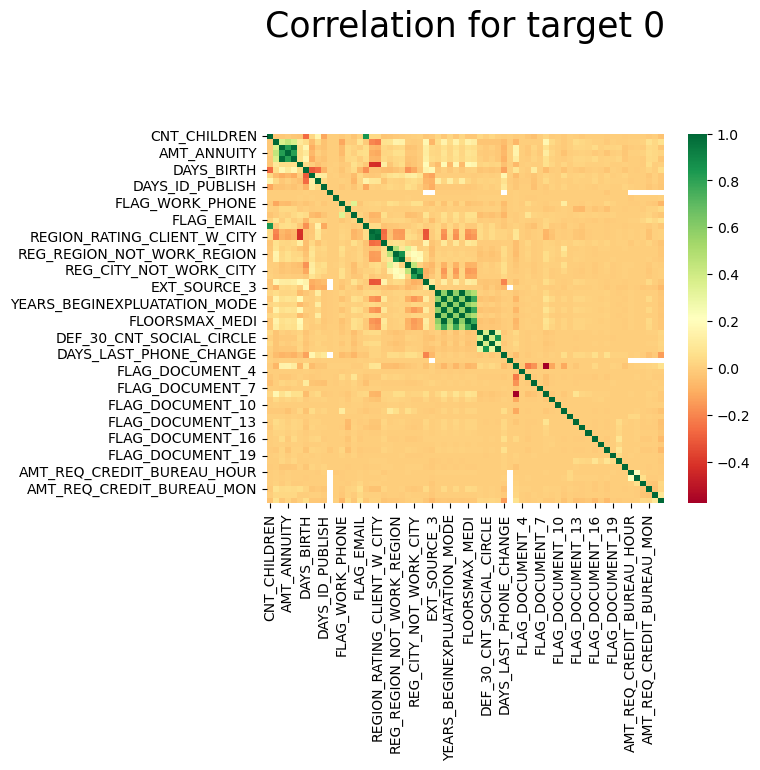

In [107]:
#Plotting the above correlation with heat map
sns.heatmap(target0, cmap="RdYlGn",annot=False)
plt.title('Correlation for target 0')
plt.yticks(rotation=0)
plt.show()

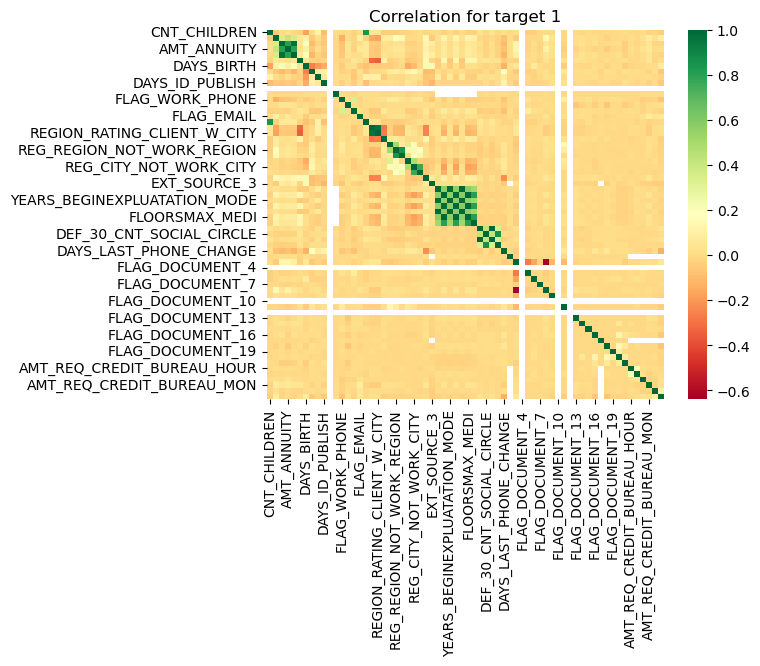

In [99]:
sns.heatmap(target1, cmap="RdYlGn",annot=False)
plt.title('Correlation for target 1')
plt.yticks(rotation=0)
plt.show()

## Analysis of previous_application dataset

#### Examine unique IDs in both datasets and draw conclusions from the findings

In [84]:
AD.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,Age_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,High,Medium,Very_Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very_high,Very_high,Middle_Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,Middle_Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Medium,Medium,Middle_Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,High,Middle_Age


In [85]:
PA.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
AD.SK_ID_CURR.nunique() , PA.SK_ID_CURR.nunique()

(243339, 338857)

In [87]:
Combined = pd.merge(AD, PA, how='left', on=['SK_ID_CURR'],suffixes=('_Current', '_Previous'))

In [88]:
Combined.shape

(1119270, 116)

In [89]:
Combined.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_Current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,AMT_GOODS_PRICE_Current,NAME_TYPE_SUITE_Current,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_Current,HOUR_APPR_PROCESS_START_Current,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,Age_Range,SK_ID_PREV,NAME_CONTRACT_TYPE_Previous,AMT_ANNUITY_Previous,AMT_APPLICATION,AMT_CREDIT_Previous,AMT_GOODS_PRICE_Previous,WEEKDAY_APPR_PROCESS_START_Previous,HOUR_APPR_PROCESS_START_Previous,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_Previous,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,High,Medium,Very_Young,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very_high,Very_high,Middle_Age,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very_high,Very_high,Middle

#### Analysis
'NAME_CONTRACT_STATUS'  Vs 'NAME_CONTRACT_TYPE_Current'

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        635143            59601
Canceled                        181925            14213
Refused                         181590            14440
Unused offer                     18299             2023


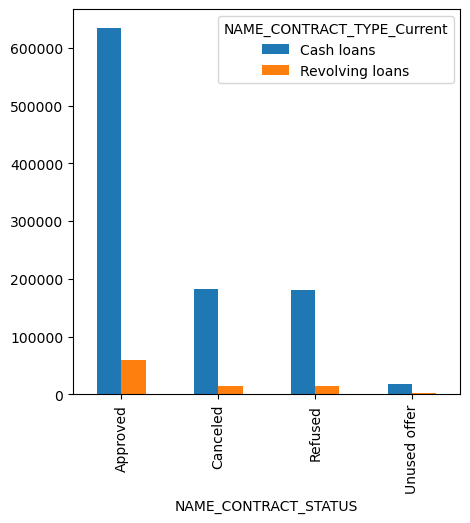

In [90]:
df1= pd.crosstab(index=Combined['NAME_CONTRACT_STATUS'],columns=Combined['NAME_CONTRACT_TYPE_Current'])
print(df1)
df1.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

### It shows that cash loans have the highest number of approved loans, and in all cases, the count of cash loans exceeds that of revolving loans.

#### Analysis
'NAME_CONTRACT_STATUS'  vs 'NAME_INCOME_TYPE'

NAME_INCOME_TYPE      Commercial associate  Maternity leave  Pensioner  State servant  Student  Working
NAME_CONTRACT_STATUS                                                                                   
Approved                            189047               10         44          59205       20   446418
Canceled                             57150                2         14          15129        3   123840
Refused                              55410                3         26          15062        1   125528
Unused offer                          4858                1          0           1465        0    13998


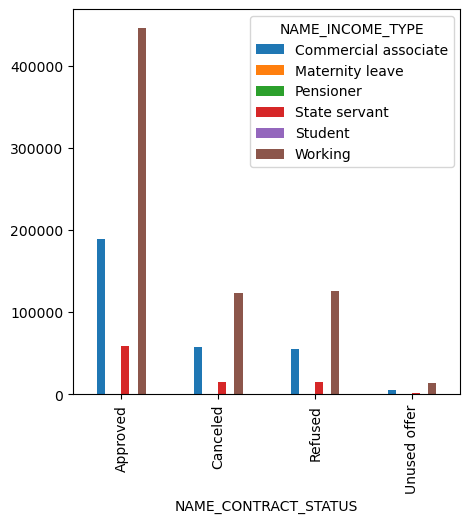

In [91]:
df2= pd.crosstab(index=Combined['NAME_CONTRACT_STATUS'],columns=Combined['NAME_INCOME_TYPE'])
print(df2)
df2.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

### Loan approval rates are highest for working professionals and students compared to other groups.

#### Analysis
'NAME_CONTRACT_STATUS'  vs 'NAME_EDUCATION_TYPE'

NAME_EDUCATION_TYPE   Academic degree  Higher education  Incomplete higher  Lower secondary  Secondary / secondary special
NAME_CONTRACT_STATUS                                                                                                      
Approved                          318            162233              24988             6279                         500926
Canceled                           42             45939               7091             1811                         141255
Refused                            80             45220               7884             1849                         140997
Unused offer                        6              6075                939              127                          13175


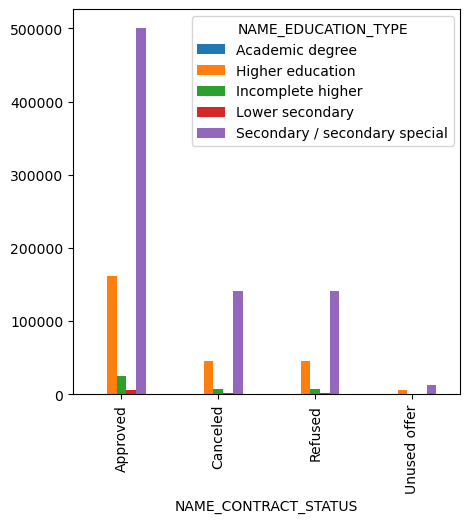

In [92]:
df3= pd.crosstab(index=Combined['NAME_CONTRACT_STATUS'],columns=Combined['NAME_EDUCATION_TYPE'])
print(df3)
df3.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

### It indicates that the loan approval rate is highest for applicants with secondary or secondary special education.

#### Analysis  
'NAME_CONTRACT_STATUS'  vs 'NAME_FAMILY_STATUS'

NAME_FAMILY_STATUS    Civil marriage  Married  Separated  Single / not married  Widow
NAME_CONTRACT_STATUS                                                                 
Approved                       73801   461128      44032                 95173  20610
Canceled                       21719   129400      12292                 26597   6130
Refused                        23975   124121      12858                 28783   6293
Unused offer                    1822    12919       1417                  3763    401


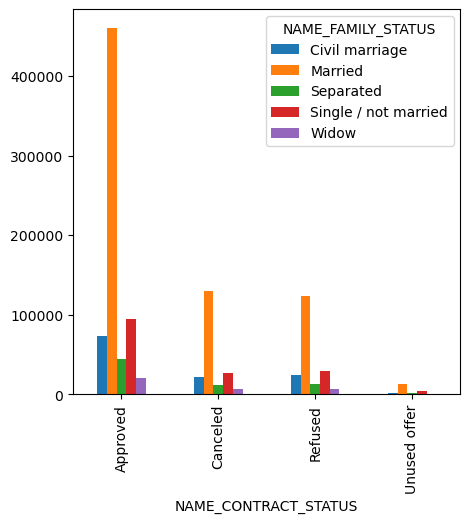

In [93]:
df4= pd.crosstab(index=Combined['NAME_CONTRACT_STATUS'],columns=Combined['NAME_FAMILY_STATUS'])
print(df4)
df4.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

### It shows that the loan approval rate is highest for married applicants compared to other statuses.

#### Analysis  
'NAME_CONTRACT_STATUS'  vs 'NAME_HOUSING_TYPE'

NAME_HOUSING_TYPE     Co-op apartment  House / apartment  Municipal apartment  Office apartment  Rented apartment  With parents
NAME_CONTRACT_STATUS                                                                                                           
Approved                         2425             611213                25814              6137             11812         37343
Canceled                          508             174109                 6877              1636              3150          9858
Refused                           593             172680                 6775              1680              3272         11030
Unused offer                      287              17575                  628               163               267          1402


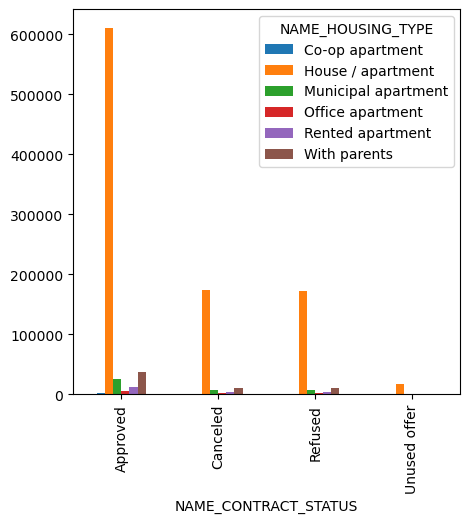

In [94]:
df5= pd.crosstab(index=Combined['NAME_CONTRACT_STATUS'],columns=Combined['NAME_HOUSING_TYPE'])
print(df5)
df5.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

### It shows that house or apartment owners have the highest loan approval rate.

# CONCLUSION
## Key Variables to Consider for Loan Prediction:

    NAME_EDUCATION_TYPE
    AMT_INCOME_TOTAL
    DAYS_BIRTH
    AMT_CREDIT
    AMT_ANNUITY
    NAME_INCOME_TYPE
    CODE_GENDER
    NAME_HOUSING_TYPE
    
## SUMMARY
The variables listed above should be carefully evaluated before approving loan applications to help reduce the risk of financial loss.